# To Start!

We first import the packages that we will be using. 

We need pandas to work on our data, matplotlib pyplot for visualizations, numpy for array calculations, and finally networkx for all our graph networks.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next, we grab the static gtfs rail text files and read them into dataframes.

In [2]:
trips = pd.read_csv('./gtfs_rail/trips.txt')
stops = pd.read_csv('./gtfs_rail/stops.txt')

Let us see what we have. We check which stops are on the 4th line.

In [3]:
stops[stops["stop_id"].str[:3] == "804"]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name
289,80401,80401,Atlantic Station,NaN,34.033398,-118.154469,NaN,0,80401S,East LA
290,80401S,80401S,Atlantic Station,NaN,34.033398,-118.154469,NaN,1,NaN,NaN
291,80401A,80401A,Atlantic Station - Pomona & Atlantic Entrance,NaN,34.033370,-118.152950,NaN,2,80401S,NaN
292,80401B,80401B,Atlantic Station - Pomona & Beverly Entrance,NaN,34.033420,-118.155310,NaN,2,80401S,NaN
293,80402,80402,East LA Civic Center Station,NaN,34.033364,-118.161206,NaN,0,80402S,ELACC
...,...,...,...,...,...,...,...,...,...,...
384,80426A,80426A,Azusa Downtown Station - Azusa Avenue Entrance...,NaN,34.135710,-117.907410,NaN,2,80426S,NaN
385,80426B,80426B,Azusa Downtown Station - Azusa Avenue Entrance...,NaN,34.135440,-117.907410,NaN,2,80426S,NaN
386,80427,80427,APU / Citrus College Station,NaN,34.136814,-117.891636,NaN,0,80427S,Azusa
387,80427S,80427S,APU / Citrus College Station,NaN,34.136814,-117.891636,NaN,1,NaN,NaN


# Cleaning the Data

Ok, so we really need to clean this data up. We remove all stops that are not part of the LA Metro rail lines (ie fake stop data) and we only want the main stop for each station.

In [4]:
stops = stops[stops["stop_id"].str[:3] < "810"]
stops = stops[stops["location_type"] == 0]

# Creating the Graph

Now we can use networkx package to create graph objects. We will be using the graph object to create calculations. We will create a simple graph for now.

First, we make simple function to turn lists of strings into int.

In [5]:
def to_int(l):
    """
    Simple function that takes in a list of strings and returns a string of integers
    """
    return [int(i) for i in l]

In [6]:
# Creating our graph
rail_network = nx.Graph()

# Node List
# Get all stop IDs and put in list
NL = stops["stop_id"].tolist()
# Cast all IDs to int type
NL = [int(i) for i in NL]
# Add node list NL as nodes to our graph
rail_network.add_nodes_from(NL)

# Edges List
# Empty list
EL = []
# Loop through our sorted stops
for i in range(len(stops)-1):
    # Grab the IDs of each stop and consecutive stop
    stop_id_1 = int(stops["stop_id"].iloc[[i]])
    stop_id_2 = int(stops["stop_id"].iloc[[i+1]])
    
    # Append the stop tuple if they are next to each other on the line
    if stop_id_1+1 == stop_id_2:
        EL.append((stop_id_1, stop_id_2))
        
# We find the intersection stops
intersection1 = stops[stops["stop_name"].str[:10] == "7th Street"]["stop_code"].tolist()
intersection1 = to_int(intersection1)
intersection2 = stops[stops["stop_name"].str[:10] == "Willowbroo"]["stop_code"].tolist()
intersection2 = to_int(intersection2)
intersection3 = stops[stops["stop_name"].str[:10] == "Union Stat"]["stop_code"].tolist()
intersection3 = to_int(intersection3)
intersection4 = stops[stops["stop_name"].str[:10] == "Expo / Cre"]["stop_code"].tolist()
intersection4 = to_int(intersection4)
# Append the intersection stops
EL.append((intersection1[0], intersection1[1]))
EL.append((intersection2[0], intersection2[1]))
EL.append((intersection3[0], intersection3[1]))
EL.append((intersection4[0], intersection4[1]))
# Add edge list to graph
rail_network.add_edges_from(EL)


# Visualization Time!

Let's see what our graph looks like.

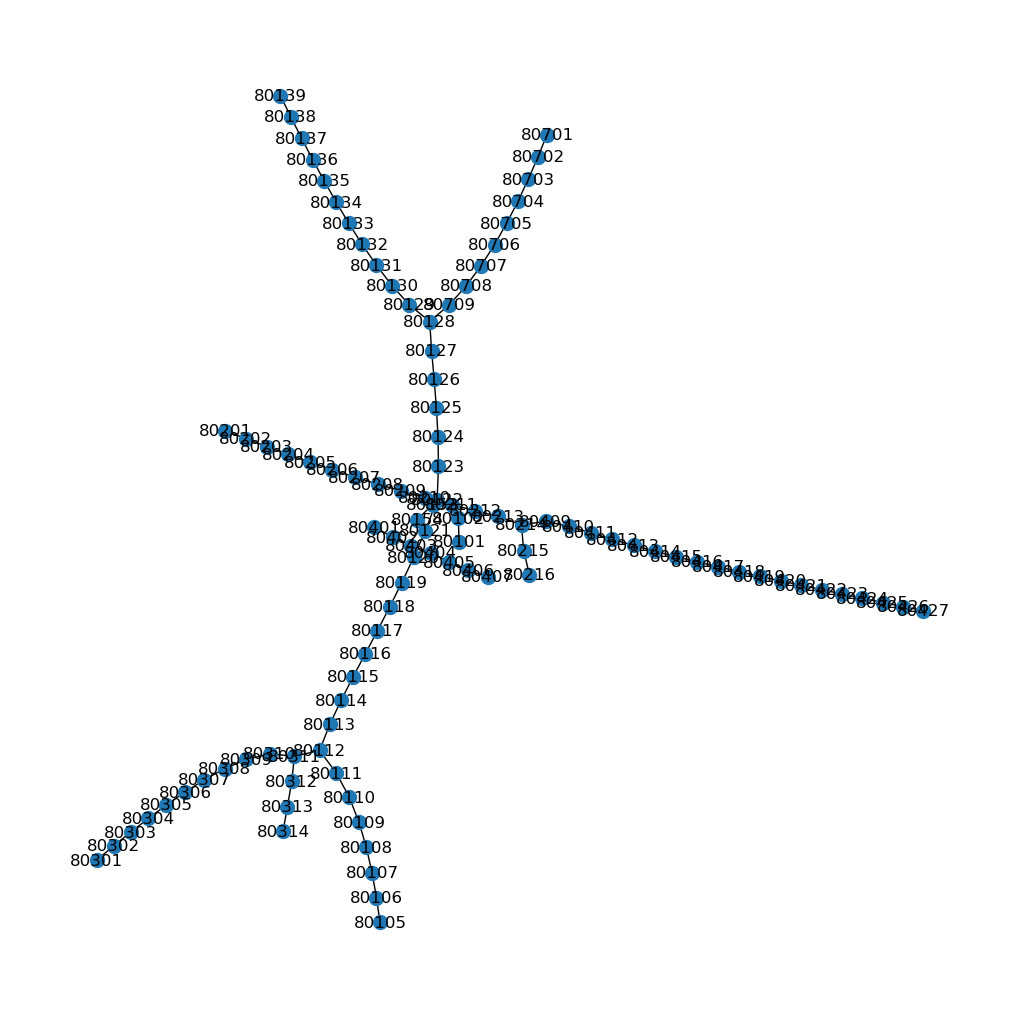

In [7]:
# Set figure size
fig = plt.figure(figsize = (10,10))
# We use Kamada-Kawai positioning algorithm to plot the nodes of the graph
nx.draw_kamada_kawai(rail_network, with_labels=True, node_size=100)

In [8]:
'''
I try to draw each line by itself, but it isnt really working... WIP i guess


fig = plt.figure(figsize = (10,10))

for i in range(7):
    plt.subplot(7,1,i+1)
    nodes = [j for j in NL if str(j)[0:3] == f"80{i+1}"]
    print(nodes)
    nx.draw_kamada_kawai(train_network, nodelist = nodes, with_labels=True, node_size=100)
    plt.xlabel(f"Line {i+1}")

plt.show()
'''

'\nI try to draw each line by itself, but it isnt really working... WIP i guess\n\n\nfig = plt.figure(figsize = (10,10))\n\nfor i in range(7):\n    plt.subplot(7,1,i+1)\n    nodes = [j for j in NL if str(j)[0:3] == f"80{i+1}"]\n    print(nodes)\n    nx.draw_kamada_kawai(train_network, nodelist = nodes, with_labels=True, node_size=100)\n    plt.xlabel(f"Line {i+1}")\n\nplt.show()\n'

# Analysis of Simple Graph

We can proceed to do some simple mathematical analysis such as centrality and modularity on our graph. 

We use Katz centrality in this case:

In [10]:
nx.katz_centrality(rail_network, max_iter = 1000)

{80101: 0.08768924098420668,
 80102: 0.08768924098420668,
 80105: 0.08868468093501888,
 80106: 0.09764366148513311,
 80107: 0.09854880467645108,
 80108: 0.09864127908424936,
 80109: 0.09866090143724021,
 80110: 0.09876468717837758,
 80111: 0.0997829744820102,
 80112: 0.10986215411396975,
 80113: 0.0997829847416514,
 80114: 0.0987647914321162,
 80115: 0.09866193916048704,
 80116: 0.09865156216477965,
 80117: 0.09865061930375373,
 80118: 0.09865156232262029,
 80119: 0.09866194105457467,
 80120: 0.09876481258276112,
 80121: 0.09978319885247112,
 80122: 0.10986429190751378,
 80123: 0.09978330397433324,
 80124: 0.09876587011500751,
 80125: 0.09867242380350669,
 80126: 0.09875536424242264,
 80127: 0.09967820618292751,
 80128: 0.10882373037040204,
 80129: 0.09967809056466327,
 80130: 0.09875419945746558,
 80131: 0.09866086971127283,
 80132: 0.09865144275834019,
 80133: 0.09865048174564138,
 80134: 0.09865029233688083,
 80135: 0.09864935026505807,
 80136: 0.09864011445713296,
 80137: 0.0985486

We can also see how modular our network is so far:

In [19]:
# Make list of stop IDs
stop_id_list = stops["stop_id"].tolist()
stop_id_list = to_int(stop_id_list)

# Make groups of IDs for each route
# Let us use a function
def route_id(i, station_list = stop_id_list):
    """
    Function that returns list of ID's given input route ID number
    """
    return [j for j in station_list if str(j)[0:3] == f"80{i}"]

# Create groups for each of our routes
route_A = route_id(1)
route_B = route_id(2)
route_C = route_id(3)
route_E = route_id(4)
route_K = route_id(7)
route_D = route_id(5)

# A list of all our groups!
route_groups = [route_A, route_B, route_C, route_E, route_K, route_D]

In [21]:
# Using our networkx function
nx.community.modularity(rail_network, route_groups)

0.7083

Our graph is really quite modular. This means that rail lines do not intersect with each other all that often in LA.

# Future Work:

We will be scraping websites and using API calls to get the needed real time and historical data for the LA rail lines to understand the congestion and how the dynamics of the network changes throughout time. We can even look at holiday rushes etc. We also plan on creating a geographical visualization and visualizing this network and ridership. We will be implementing our findings into an easy to use web app.